In [1]:
import zipfile
import os

# Path to your ZIP file
zip_path = r"C:\Users\parag\Downloads\archive (1).zip"  # Use 'r' to handle backslashes

# Folder where files will be extracted
extract_path = r"C:\Users\parag\Downloads\dataset"

# Extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete! Files extracted to:", extract_path)

# List extracted files
files = os.listdir(extract_path)
print("Extracted files:", files)


Extraction complete! Files extracted to: C:\Users\parag\Downloads\dataset
Extracted files: ['7817_1.csv']


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual file name
csv_path = r"C:\Users\parag\Downloads\dataset\7817_1.csv"

# Load dataset
df = pd.read_csv(csv_path)

# Show first few rows
print(df.head())

# Check column names
print(df.columns)


                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [4]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import joblib

# Load dataset
csv_path = r"C:\Users\parag\Downloads\dataset\7817_1.csv"  # Update with actual filename
df = pd.read_csv(csv_path)

# Keep only necessary columns
df = df[['reviews.text', 'reviews.rating']].dropna()

# Convert ratings into sentiment labels
def label_sentiment(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating == 3.0:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['reviews.rating'].apply(label_sentiment)

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_text'] = df['reviews.text'].apply(clean_text)

# Display cleaned dataset
print(df.head())


                                        reviews.text  reviews.rating  \
0  I initially had trouble deciding between the p...             5.0   
1  Allow me to preface this with a little history...             5.0   
2  I am enjoying it so far. Great for reading. Ha...             4.0   
3  I bought one of the first Paperwhites and have...             5.0   
4  I have to say upfront - I don't like coroporat...             5.0   

  sentiment                                       cleaned_text  
0  Positive  i initially had trouble deciding between the p...  
1  Positive  allow me to preface this with a little history...  
2  Positive  i am enjoying it so far great for reading had ...  
3  Positive  i bought one of the first paperwhites and have...  
4  Positive  i have to say upfront i dont like coroporate h...  


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)

# Build a pipeline (TF-IDF + Logistic Regression)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Convert text to numeric features
    ('model', LogisticRegression())  # Train model
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Save the trained model
joblib.dump(pipeline, 'sentiment_model.pkl')
print("Model saved successfully!")


Model Accuracy: 0.8898305084745762
Model saved successfully!


In [6]:
# Load trained model
import joblib

model = joblib.load("sentiment_model.pkl")

# Sample test
sample_review = ["This product is amazing! I love it."]
predicted_sentiment = model.predict(sample_review)

print("Predicted Sentiment:", predicted_sentiment[0])


Predicted Sentiment: Positive


In [7]:
import pandas as pd
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("C:/Users/parag/Downloads/archive (1).zip")
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [9]:
df = df[['reviews.text', 'reviews.rating']].dropna()
df.head()


,reviews.text,reviews.rating
0,I initially had trouble deciding between the p...,5.0
1,Allow me to preface this with a little history...,5.0
2,I am enjoying it so far. Great for reading. Ha...,4.0
3,I bought one of the first Paperwhites and have...,5.0
4,I have to say upfront - I don't like coroporat...,5.0


In [10]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a score between -1 and 1

df['sentiment_score'] = df['reviews.text'].apply(get_sentiment)
df.head()


,reviews.text,reviews.rating,sentiment_score
0,I initially had trouble deciding between the p...,5.0,0.200259
1,Allow me to preface this with a little history...,5.0,0.159591
2,I am enjoying it so far. Great for reading. Ha...,4.0,0.420833
3,I bought one of the first Paperwhites and have...,5.0,0.148821
4,I have to say upfront - I don't like coroporat...,5.0,0.267086


In [11]:
def categorize_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)
df.head()


,reviews.text,reviews.rating,sentiment_score,sentiment_category
0,I initially had trouble deciding between the p...,5.0,0.200259,Positive
1,Allow me to preface this with a little history...,5.0,0.159591,Positive
2,I am enjoying it so far. Great for reading. Ha...,4.0,0.420833,Positive
3,I bought one of the first Paperwhites and have...,5.0,0.148821,Positive
4,I have to say upfront - I don't like coroporat...,5.0,0.267086,Positive


C:\Users\parag\AppData\Local\Temp\ipykernel_400\3248454751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment_category'], palette="coolwarm")


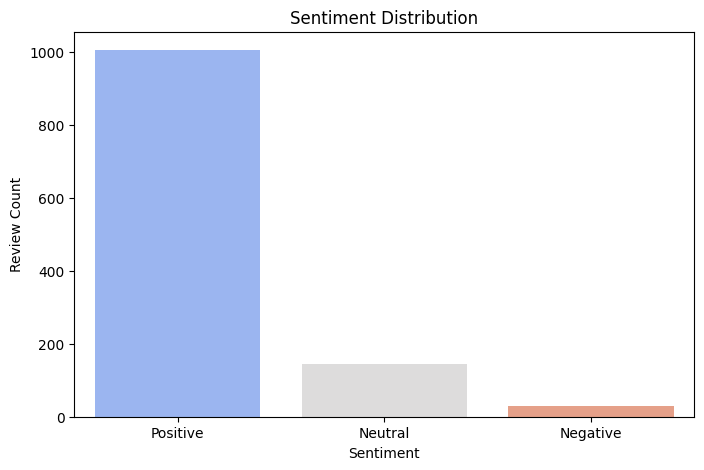

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['sentiment_category'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.show()


In [13]:
nlp = spacy.load("en_core_web_sm")

def extract_aspects(text):
    doc = nlp(text)
    aspects = [token.text.lower() for token in doc if token.pos_ == "NOUN"]
    return aspects

df['aspects'] = df['reviews.text'].apply(extract_aspects)
df.head()


,reviews.text,reviews.rating,sentiment_score,sentiment_category,aspects
0,I initially had trouble deciding between the p...,5.0,0.200259,Positive,"[trouble, paperwhite, voyage, reviews, thing, ..."
1,Allow me to preface this with a little history...,5.0,0.159591,Positive,"[history, reader, series, series, titles, use,..."
2,I am enjoying it so far. Great for reading. Ha...,4.0,0.420833,Positive,"[fire, eyes]"
3,I bought one of the first Paperwhites and have...,5.0,0.148821,Positive,"[companion, book, days, past, years, d, finger..."
4,I have to say upfront - I don't like coroporat...,5.0,0.267086,Positive,"[upfront, stuff, case, devices, user, years, f..."


C:\Users\parag\AppData\Local\Temp\ipykernel_400\3122366353.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aspect_df['Aspect'], y=aspect_df['Count'], palette="viridis")


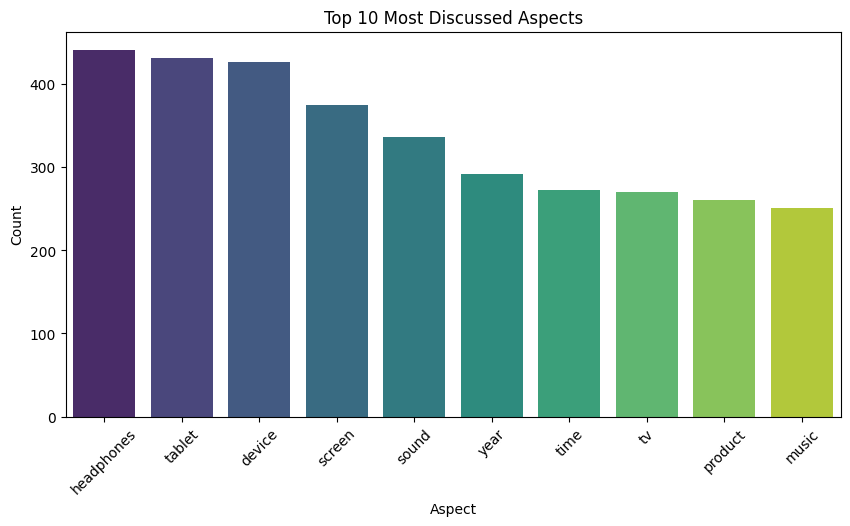

In [14]:
from collections import Counter

all_aspects = [aspect for sublist in df['aspects'] for aspect in sublist]
top_aspects = Counter(all_aspects).most_common(10)

# Convert to DataFrame for visualization
aspect_df = pd.DataFrame(top_aspects, columns=['Aspect', 'Count'])

plt.figure(figsize=(10, 5))
sns.barplot(x=aspect_df['Aspect'], y=aspect_df['Count'], palette="viridis")
plt.title("Top 10 Most Discussed Aspects")
plt.xticks(rotation=45)
plt.show()


C:\Users\parag\AppData\Local\Temp\ipykernel_400\1467019097.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aspect_sentiment_df['Aspect'], y=aspect_sentiment_df['Sentiment Score'], palette="coolwarm")


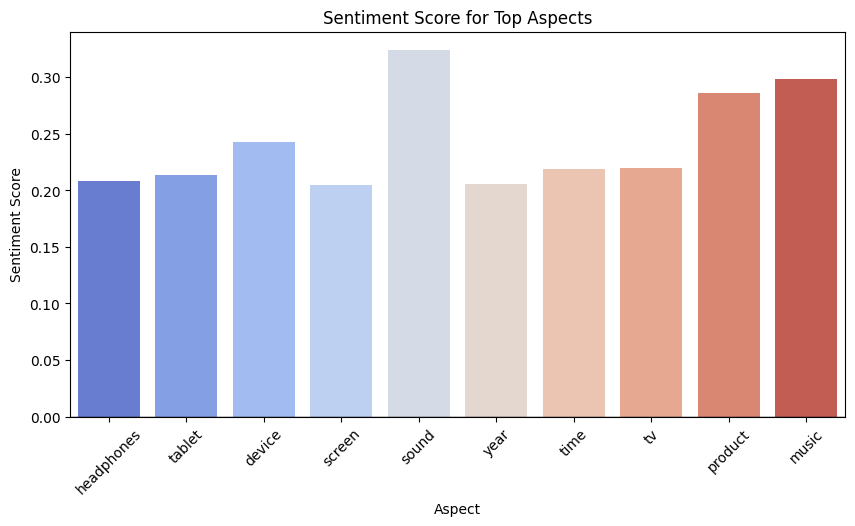

In [15]:
aspect_sentiments = {}

for aspect in aspect_df['Aspect']:
    aspect_reviews = df[df['reviews.text'].str.contains(aspect, case=False, na=False)]
    avg_sentiment = aspect_reviews['sentiment_score'].mean()
    aspect_sentiments[aspect] = avg_sentiment

# Convert to DataFrame
aspect_sentiment_df = pd.DataFrame(list(aspect_sentiments.items()), columns=['Aspect', 'Sentiment Score'])

plt.figure(figsize=(10, 5))
sns.barplot(x=aspect_sentiment_df['Aspect'], y=aspect_sentiment_df['Sentiment Score'], palette="coolwarm")
plt.axhline(0, color='black', linewidth=1)
plt.title("Sentiment Score for Top Aspects")
plt.xticks(rotation=45)
plt.show()


In [16]:
df.to_csv("processed_reviews.csv", index=False)
print("Processed dataset saved as 'processed_reviews.csv'")


Processed dataset saved as 'processed_reviews.csv'
